In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1) Loading photometric and spectroscopic final catalogs

In [177]:
%%time
euclid = pd.read_csv("../data/2018-01-04_Euclid_photometry_matched2tips.csv")
tips_wide = pd.read_csv("../data/2018-01-04_Euclid_tips_spectra_wide_matched.csv")
tips_deep = pd.read_csv("../data/2018-01-04_Euclid_tips_spectra_deep_matched.csv")

CPU times: user 47.3 s, sys: 1.33 s, total: 48.6 s
Wall time: 49.9 s


In [89]:
euclid.columns.values

array(['Id', 'SpcExt', 'redshift', 'Flux_Ha', 'Disp_Ha', 'Conti_Ha',
       'Lambda_Ha'], dtype=object)

# 2) Select a grid of z-H$\alpha$ values to inspect plots

In [90]:
zs = np.arange(1.0, 1.8, 0.2)
Halphas = np.logspace(-17, -14.8, 5)

# 3) Select galaxies from the photometric sample

In [136]:
keep = []
for zvalue in zs:
    for Hvalue in Halphas:
        zclose = (np.abs(euclid["redshift"] - zvalue) < 1e-2)
        Hclose = ((np.abs(euclid["Flux_Ha"] - Hvalue)/Hvalue) < 0.05)
        try:
            idx = np.where(zclose & Hclose)[0][1]
        except:
            pass
        if Hvalue > 1e-15:
            continue
        elem = euclid.iloc[idx]
        keep.append((elem["redshift"], elem["Flux_Ha"], elem["Id"]))

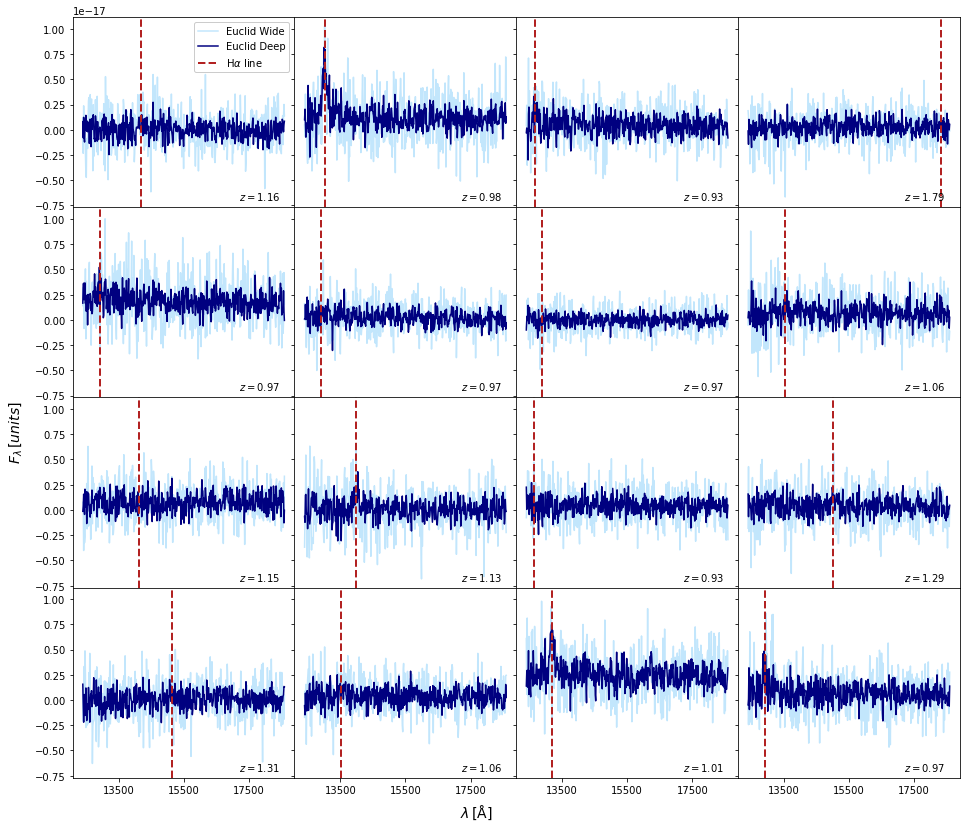

In [270]:
np.random.seed(2342)
fig, axtup = plt.subplots(nrows=4, ncols=4, figsize=(14, 12), sharex=True, sharey=True)
axtup = axtup.flatten()
for i, ax in enumerate(axtup):
    idx = np.random.randint(len(euclid), size=1)
    specwide = tips_wide.iloc[:, idx]
    specdeep = tips_deep.iloc[:, idx]
    idspec = specwide.columns.values
    assert specwide.columns.values == specdeep.columns.values
    properties = euclid[euclid["Id"].values == int(idspec[0])]
    redshift = properties["redshift"].values[0]
    Lambda_Ha = properties["Lambda_Ha"].values[0]
    
    ax.plot(tips_wide["lambda"], specwide, color="lightskyblue", alpha=0.5, label="Euclid Wide")
    ax.plot(tips_deep["lambda"], specdeep, color="navy", label="Euclid Deep")
    ax.axvline(Lambda_Ha, linewidth=2, linestyle="--", color="firebrick", label="H$\\alpha$ line")
    ax.set_xticks(np.linspace(13500, 17500, 3))
    if i != 0:
        ax.yaxis.get_offset_text().set_visible(False)
    if i == 0:
        leg = ax.legend(loc="upper right")
        leg.get_frame().set_alpha(1)
    ax.text(17200, -0.7e-17, ("$z = %.2f$" % redshift))
    
# Common labels
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.98, top=0.98, hspace=0, wspace=0)
fig.text(0.5, 0.05, "$\lambda\,$[$\mathrm{\AA}$]", ha="center", va="bottom", fontsize=14)
fig.text(0.035, 0.5, "$F_{\lambda}\,$[$units$]", ha="left", va="center", rotation="vertical", fontsize=14)

plt.savefig("../doc/figures/astro_draft/tips_spectra.eps")

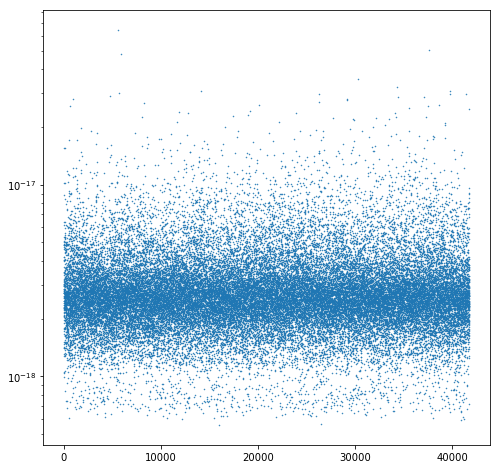

In [162]:
plt.figure(figsize=(8, 8))
plt.plot(tips_wide.quantile(q=0.9999, axis=0).values[1:], ".", markersize=1)
plt.yscale("log")

In [153]:
?tips_wide.quantile

Signature: tips_wide.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')
Docstring:
Return values at the given quantile over requested axis, a la
numpy.percentile.

Parameters
----------
q : float or array-like, default 0.5 (50% quantile)
    0 <= q <= 1, the quantile(s) to compute
axis : {0, 1, 'index', 'columns'} (default 0)
    0 or 'index' for row-wise, 1 or 'columns' for column-wise
interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
    .. versionadded:: 0.18.0

    This optional parameter specifies the interpolation method to use,
    when the desired quantile lies between two data points `i` and `j`:

    * linear: `i + (j - i) * fraction`, where `fraction` is the
      fractional part of the index surrounded by `i` and `j`.
    * lower: `i`.
    * higher: `j`.
    * nearest: `i` or `j` whichever is nearest.
    * midpoint: (`i` + `j`) / 2.

Returns
-------
quantiles : Series or DataFrame

    - If ``q`` is an array, a DataFrame will be returned 

In [129]:
tips_std.

pandas.core.series.Series